In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#importing relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# this is a classification problem where we need to classify whether the person is survived in the titanic accident or not.
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.head()
#By looking at the data we can see PassengerId and Name doesn't add much value to the model or my model will not learn much from these features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [5]:
df_train.isnull().sum()
#there are missing values in the dataset so we cannot move further before solving these missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.info()
# there are 7 numerical(quantitative) columns and 5 categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.shape
#It contains 891 rows or records or experiments and 12 columns or feat

(891, 12)

In [8]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df_train.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [10]:
#checking for the data imbalance
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_test.shape

(418, 11)

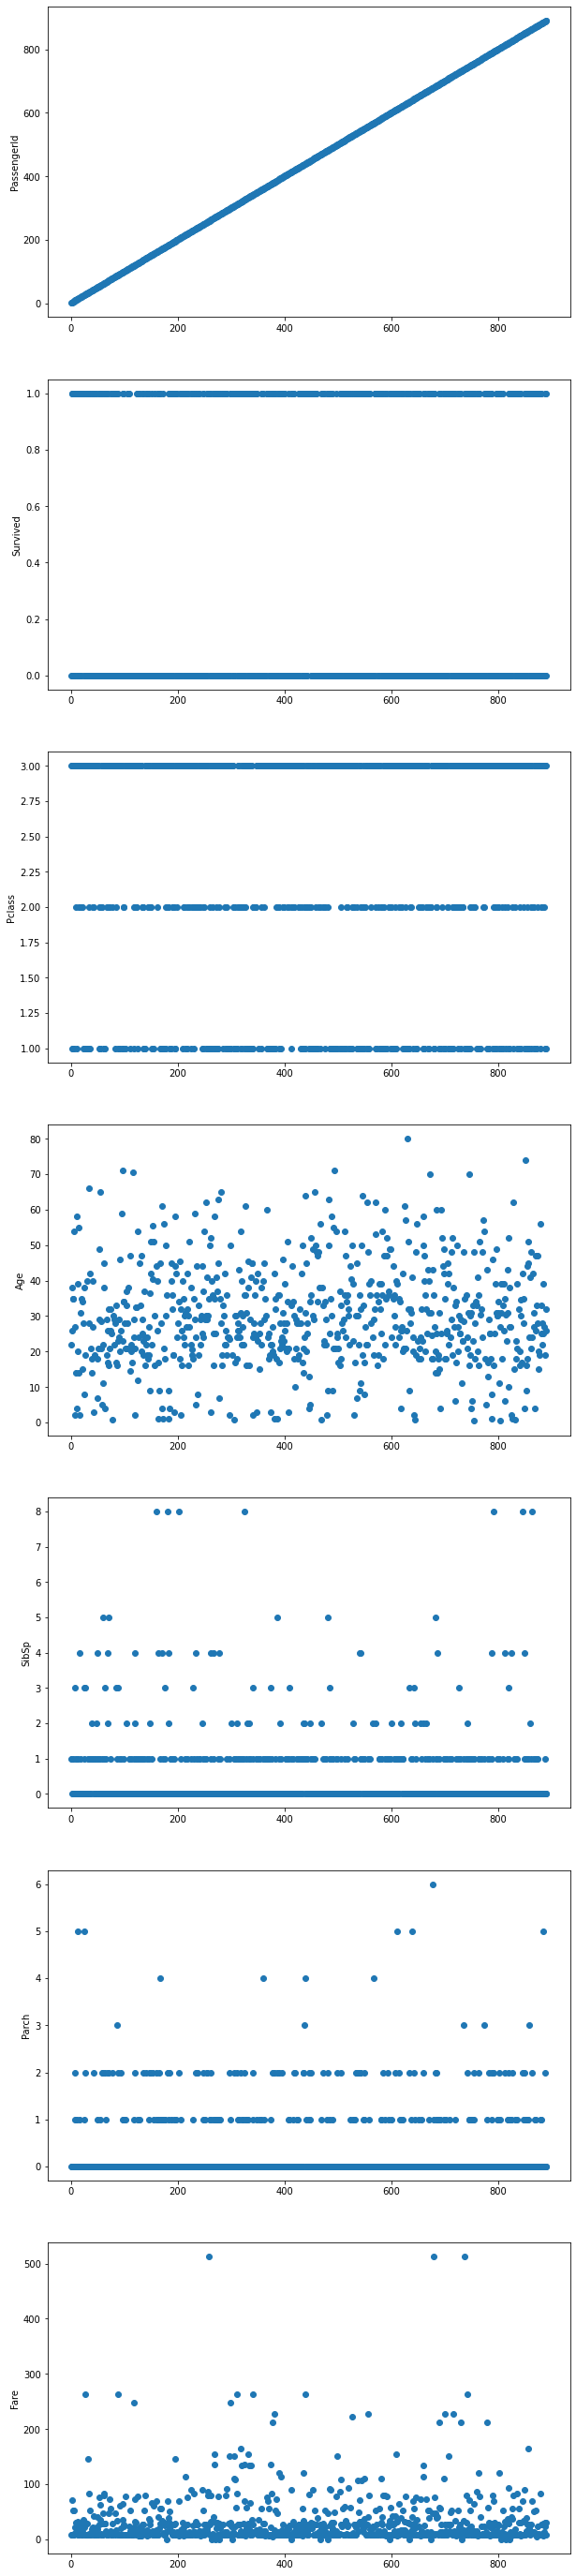

In [13]:
num_col = df_train.select_dtypes(include=np.number)#selecting numeric datatype

col_index = 0

rows = 7
col = 1

fig , ax = plt.subplots(nrows=rows,ncols=col,figsize=[10,50])
for row_count in range(rows):
    ax[row_count].scatter(y=num_col.iloc[:,row_count],x=num_col.index)
    ax[row_count].set_ylabel(num_col.columns[row_count])
    
# there are outliers in column 'Fare'

In [14]:
#Analyzing the categorical values
df_cat = df_train.select_dtypes(include=np.object)

cat_col = list(df_cat.columns)

for i in cat_col:
    print(f'Number of unique values in column {i} : {df_cat[i].nunique()}')
    
# Column 'Name' has 891 unique values in 891 records as this is for identification we can drop this column
# Similarly 'Ticket' and 'cabin' also can be ignored for now as these will not add much value to my model
# column 'sex' and 'embarked' can be mapped to create dummies

Number of unique values in column Name : 891
Number of unique values in column Sex : 2
Number of unique values in column Ticket : 681
Number of unique values in column Cabin : 147
Number of unique values in column Embarked : 3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Data Preprocessing

In [15]:
# Based on the EDA we will take below action on training set.
# 1. Remove the columns which are not necessary or not relevant
# 2. handling missing values
# 3. handle outliers
# 4. handle categorical values
# 5. Do the scaling


In [16]:
#### 1. Remove irrelevant columns in the dataset ####
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
final_sub = df_test['PassengerId']

In [18]:
#dropping passengerid which is a numeric column
dropped_col = []
df_train.drop(['PassengerId'],axis=1,inplace=True)
df_test.drop(['PassengerId'],axis=1,inplace=True)
dropped_col.append('PassengerId')
df_train.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
#dropping Name and ticket column as there are not relevant or these does not add much value to my model
df_train.drop(['Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Name','Ticket'],axis=1,inplace=True)
dropped_col.extend(['Name','Ticket'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
#dropping cabin column for now because it hard to create 147(unique values) dummies for this
df_train.drop(['Cabin'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)
dropped_col.append('Cabin')
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
#### 2. Handling The Missing Value ####

df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [23]:
#Age column is a numeric column, we have 177 null values,
#it is more than 15% of data so removing them is not a best option.
#So we have to replace these with mean or median and we choose median beause mean will get affected severely by outliers

df_train['Age'].median()

#28.0 is the median for Age column



28.0

In [24]:
#replacing null values with median 28
df_train['Age'].replace(np.nan,df_train['Age'].median(),inplace=True)

In [25]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [26]:
df_test['Age'].median()
#27 is meadian for test data

27.0

In [27]:
#replacing null values with median 27
df_test['Age'].replace(np.nan,df_test['Age'].median(),inplace=True)

In [28]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:

df_test['Fare'].replace(np.nan,df_test['Fare'].median(),inplace=True)

In [30]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
#there are only 2 missing values in Embarked column hence we are removing these rows
df_train.dropna(subset=['Embarked'],inplace=True)

In [32]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
#### 3. Handling outlier ####
# By using the graphs in EDA, i can see there are 3 outliers in Fare column so to handle this,
# we can capp these values
df_train.loc[df_train['Fare']>400]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [34]:
# we can capp these values to 300
df_train['Fare'].loc[df_train['Fare']>400]=300

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
df_train.loc[df_train['Fare']>400]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [36]:
#### 4. Handling categorical values ####
df_train.select_dtypes(include=np.object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [37]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [38]:
df_train['Sex'] = df_train['Sex'].map({'male':0,'female':1})
df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})

In [39]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
#getting dummies for training data
embarked_dummies = pd.get_dummies(df_train['Embarked'],prefix='Embarked')#created a dummies column for Embarked

df_train.drop(['Embarked'],inplace=True,axis=1) # Now we can remove Embarked column

df_train = pd.concat([df_train,embarked_dummies],axis=1)#Adding these dummies column to the dataset

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [42]:
#getting dummies for test data
embarked_dummies = pd.get_dummies(df_test['Embarked'],prefix='Embarked')#created a dummies column for Embarked

df_test.drop(['Embarked'],inplace=True,axis=1) # Now we can remove Embarked column

df_test = pd.concat([df_test,embarked_dummies],axis=1)#Adding these dummies column to the dataset

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [43]:
### getting feature and target
df_train_features = df_train.drop(['Survived'],axis=1)
df_train_target = df_train['Survived']
df_train_features.head()

col_names = list(df_train_features.columns)

In [44]:
#### 5. Now lets do the Scaling ####

from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #Instance creation

scale.fit(df_train_features) ## it will compute mean and standard deviation of every column

scaled_df = scale.transform(df_train_features) ### apply the formula (x-mean)/s.d
# we can also fit and transform at a time using fit_transform method

scaled_df_train_features = pd.DataFrame(data=scaled_df,columns=col_names)
scaled_df_train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,-0.735342,-0.563674,0.431350,-0.474326,-0.549194,-0.482711,-0.307941,0.616794
1,-1.572211,1.359911,0.669217,0.431350,-0.474326,0.908182,2.071634,-0.307941,-1.621287
2,0.825209,1.359911,-0.255451,-0.475199,-0.474326,-0.533831,-0.482711,-0.307941,0.616794
3,-1.572211,1.359911,0.438050,0.431350,-0.474326,0.494336,-0.482711,-0.307941,0.616794
4,0.825209,-0.735342,0.438050,-0.475199,-0.474326,-0.530986,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.178396,-0.475199,-0.474326,-0.418326,-0.482711,-0.307941,0.616794
885,-1.572211,1.359911,-0.794841,-0.475199,-0.474326,-0.031412,-0.482711,-0.307941,0.616794
886,0.825209,1.359911,-0.101340,0.431350,2.006119,-0.180488,-0.482711,-0.307941,0.616794
887,-1.572211,-0.735342,-0.255451,-0.475199,-0.474326,-0.031412,2.071634,-0.307941,-1.621287


In [45]:
#scaling test data
scale = StandardScaler() #Instance creation

scale.fit(df_test) ## it will compute mean and standard deviation of every column

scaled_df = scale.transform(df_test) ### apply the formula (x-mean)/s.d
# we can also fit and transform at a time using fit_transform method

scaled_df_test = pd.DataFrame(data=scaled_df,columns=col_names)
scaled_df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,-0.755929,0.386231,-0.499470,-0.400248,-0.497413,-0.568142,2.843757,-1.350676
1,0.873482,1.322876,1.371370,0.616992,-0.400248,-0.512278,-0.568142,-0.351647,0.740370
2,-0.315819,-0.755929,2.553537,-0.499470,-0.400248,-0.464100,-0.568142,2.843757,-1.350676
3,0.873482,-0.755929,-0.204852,-0.499470,-0.400248,-0.482475,-0.568142,-0.351647,0.740370
4,0.873482,1.322876,-0.598908,0.616992,0.619896,-0.417492,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.755929,-0.204852,-0.499470,-0.400248,-0.493455,-0.568142,-0.351647,0.740370
414,-1.505120,1.322876,0.740881,-0.499470,-0.400248,1.314435,1.760125,-0.351647,-1.350676
415,0.873482,-0.755929,0.701476,-0.499470,-0.400248,-0.507796,-0.568142,-0.351647,0.740370
416,0.873482,-0.755929,-0.204852,-0.499470,-0.400248,-0.493455,-0.568142,-0.351647,0.740370


# Data Modelling

In [46]:
df_train_target.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [47]:
scaled_df_train_features.shape , df_train_target.shape

((889, 9), (889,))

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_df_train_features,df_train_target)

RandomForestClassifier()

In [49]:
train_pred = rfc.predict(scaled_df_train_features)
train_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [50]:
#Checking the training accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

res_train = confusion_matrix(train_pred,df_train_target)
print('ConfusionMatrix of training data:\n',res_train)
print('\nAccuracy of training data:\n',accuracy_score(train_pred,df_train_target))
print('\nClassification Report of traing data:\n',classification_report(train_pred,df_train_target))

ConfusionMatrix of training data:
 [[542  11]
 [  7 329]]

Accuracy of training data:
 0.9797525309336333

Classification Report of traing data:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       553
           1       0.97      0.98      0.97       336

    accuracy                           0.98       889
   macro avg       0.98      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



In [51]:
test_pred = rfc.predict(scaled_df_test)
test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
test_pred.shape

(418,)

In [53]:
final_sub.shape

(418,)

In [54]:
type(test_pred)

numpy.ndarray

In [55]:
type(final_sub)

pandas.core.series.Series

In [56]:
test = pd.DataFrame(test_pred)
final = pd.concat([final_sub,test],axis=1)

In [57]:
final.rename(columns = {0:'Survived'},inplace=True)

In [58]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
final.to_csv('E:\Titanic_submission.csv',index=False)